<a href="https://colab.research.google.com/github/sRobinson1209/StatsModelingProject/blob/main/newStatsModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn import metrics

In [ ]:
#WRITE UP -- the classification portion is the second part in the code but I marked where it starts
# PREDICTION 1: CLASSIFICATION - #Using knn to predict if the student passed based on sleep, hours studied, and extra curricular activities
# The model performed well predicting pass correctly. This could definitley have something to do with the fact that of the
  # of the 10,000 data points, 7,000 passed. The accuracy score was about 75%. It was not good at predicitng fail. It predicted
    # corrrectly 108 of 479 fails. This again I believe has to do with the large ratio of pass to fail. One predictor that is very
    # important is previous score, which is to be expected.

    #I did the decision tree classifier as well, The accuracy score was 0.96, with the max depth of 5. I predicted the encoded_performance based off the other predictors.

#PREDICTION 2: REGRESSION - PREDICTING SLEEP HOURS BASED ON ALL OTHER PREDICTORS (except performance index group)
  #accuracy using knn regression- mse = 3.1691333333333334, r2 = -0.42747533144192884 (terrible!)The model is not performing well
  #anywhere :'). Using this set, I noticed that the good model is predicting performance index. This is because it relies
  # heavily on the previous score to predict the outcome of the performance index.

#TUNING AND VALIDATION
# I used K-fold for validation and K for tuning. I did this on the classification problem. Choosing different K values did not
# change the outcome of predicting pass/fail. It hovered around 75 for multiple K values. Also supported by the K-fold cross validation
# when I did that, my mean score was 0.7235.

In [ ]:
url = 'https://raw.githubusercontent.com/sRobinson1209/student/main/Student_Performance.csv'
student_df = pd.read_csv(url)

In [ ]:
#data dictionary
#hours studied - quantitative - The total number of hours spent studying by each student.
# previous score - quantitative - what eahc student got on the previos exam
# extracurricular Activities - categorical - Whether or not the student was involved in outside activites
# sleep hours - quantitative - total hours of sleep the student gotper day
# sample question papers practiced - quantitative - The number of sample question papers the student practiced.
# performance index - quantitative - A measure of the overall performance of each student. The performance index represents the student's academic
#          performance and has been rounded to the nearest integer.
            #The index ranges from 10 to 100, with higher values indicating better performance.
# performance index is also the target variable of the dataset

In [ ]:
student_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


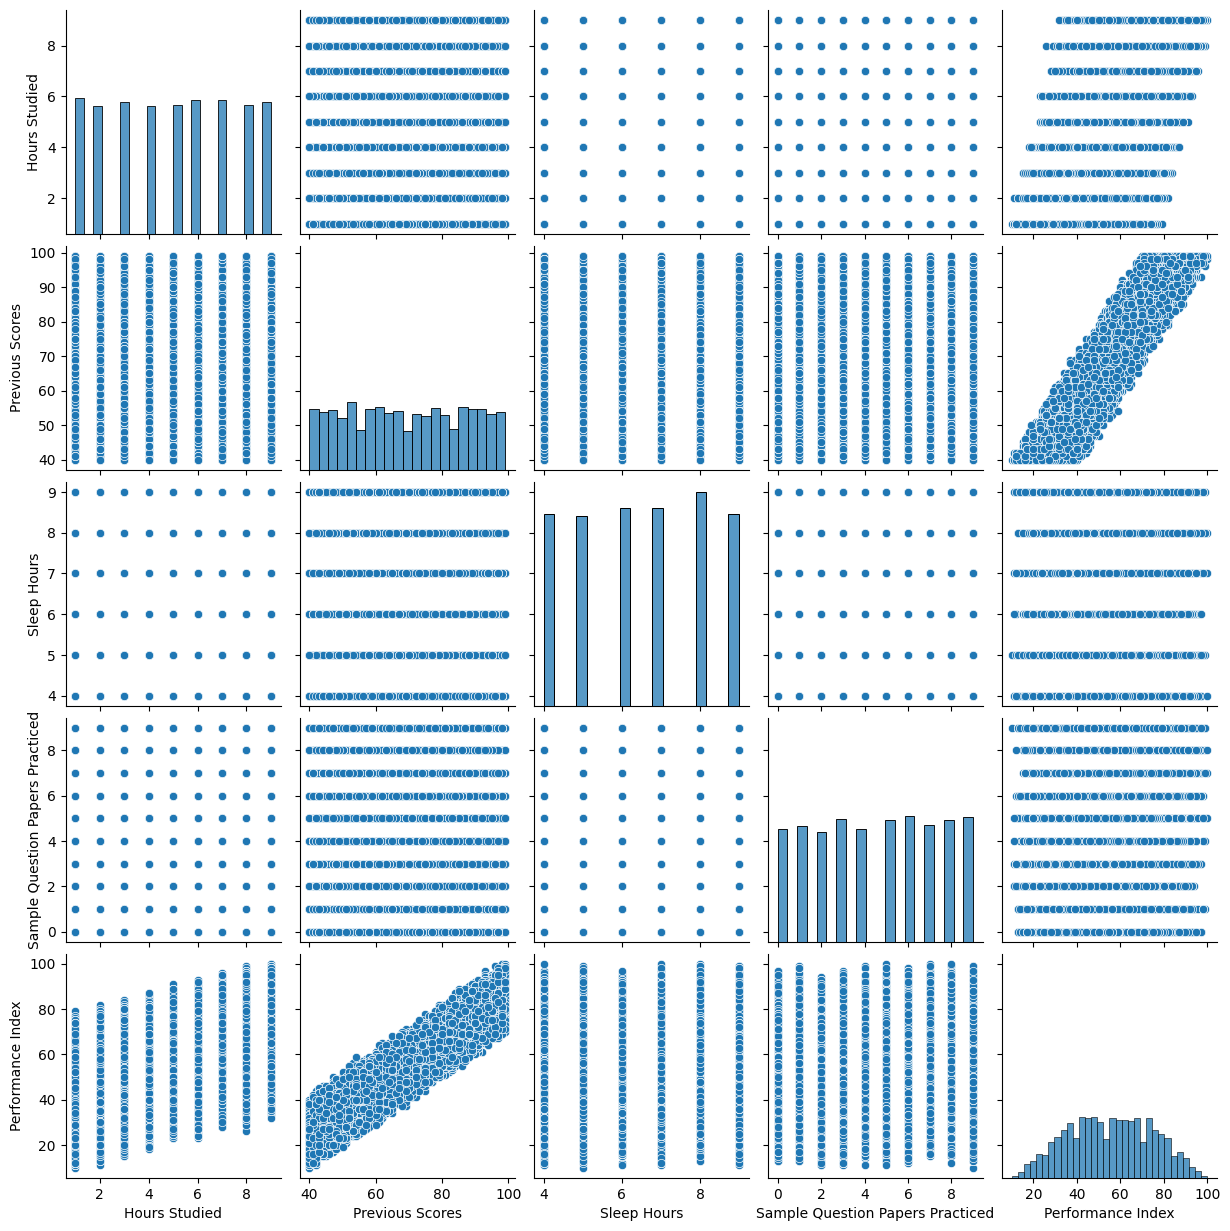

In [ ]:
sns.pairplot(student_df)

In [ ]:
student_df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
student_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [ ]:
#This categorizes the Performance Index values into predefined bins and assigns the corresponding labels to each value based on the specified intervals and labels.

category = pd.cut(student_df['Performance Index'], bins=[0, 39, 49, 59, 69, 100], labels=['Fail', 'Pass', 'Credit', 'Merit', 'Distinction'])

In [ ]:
#This code create a new column named 'Performance Index Group',
#containing the performance index group categories based on the predefined bins and labels.

student_df.insert(6,'Performance Index Group',category)

<ipython-input-12-33fd03b010aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Performance Index Group", data=student_df, palette="Set2")


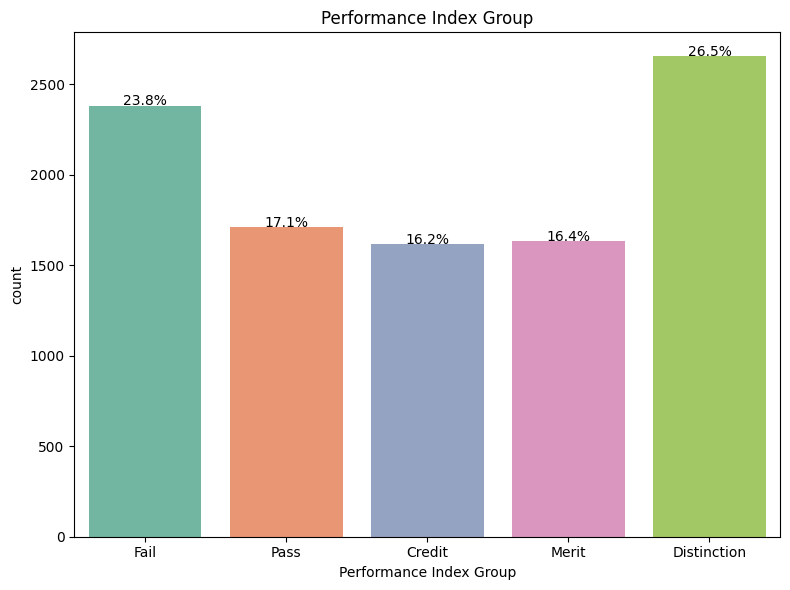

In [ ]:
plt.figure(figsize=(8, 6))

# Plot countplot for Performance Index Group
sns.countplot(x="Performance Index Group", data=student_df, palette="Set2")
plt.title("Performance Index Group")

# Add percentage labels
total = float(len(student_df))  # Total number of samples
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height/total:.1%}', ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

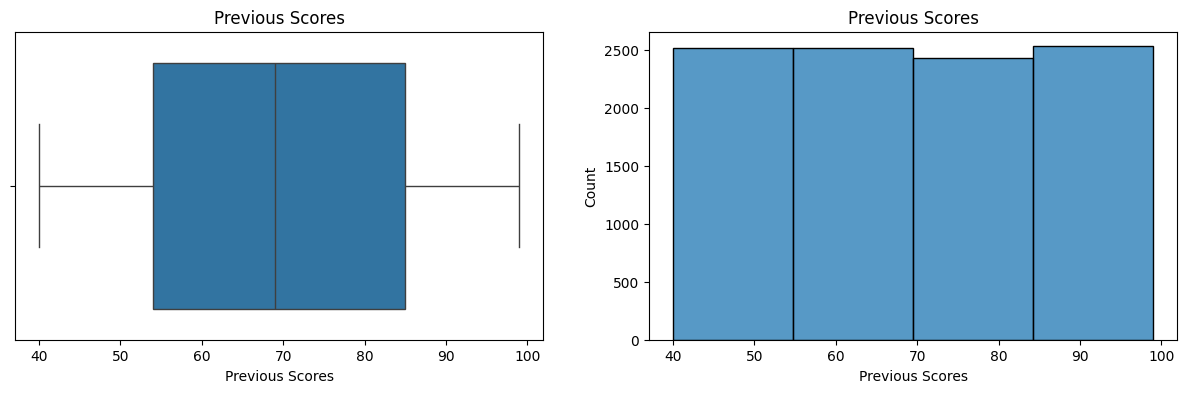

In [ ]:
#define functions for visualizations

def boxplot(column_name):
    fig,ax=plt.subplots(1,2,figsize=(15,4))
    sns.boxplot(data=student_df, x=column_name, ax=ax[0])
    sns.histplot(data=student_df, x=column_name, bins=4, ax=ax[1])
    ax[0].set_title(column_name)
    ax[1].set_title(column_name)
    plt.show()

boxplot("Previous Scores")

# this shows the average score was around 70 points with the minimum being 40 and a max of 100

In [ ]:
# Convert 'Extracurricular Activities' to numeric encoding
student_df['Extracurricular Activities'] = student_df['Extracurricular Activities'].map({'No': 0, 'Yes': 1})

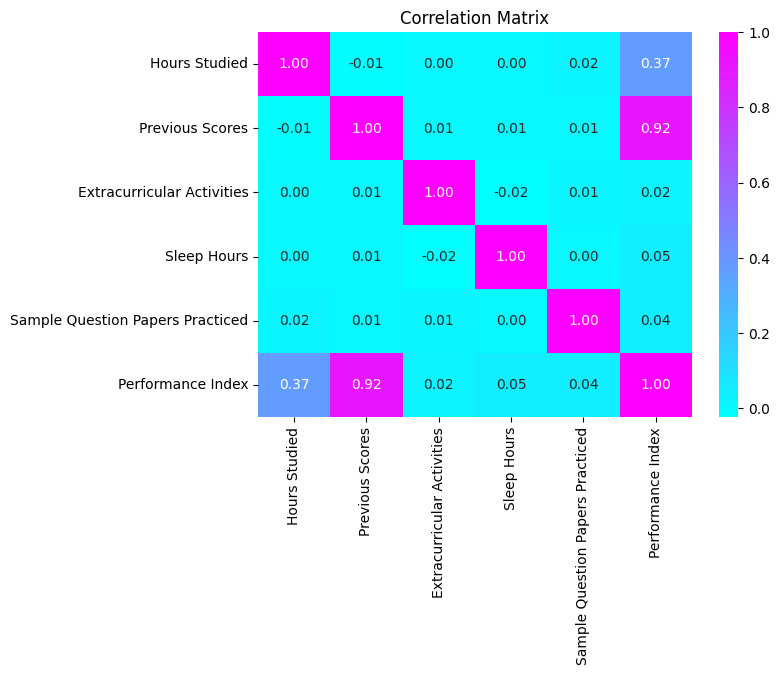

In [ ]:
# Heatmap: Correlation Matrix
correlation_matrix = student_df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#previous score has a 92% contribution to performance index followed by hours studied at 32%

In [ ]:
## target variable is sleep, predictors are extracurricular everything (- performance index group )

In [ ]:
student_df.columns.unique()

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Performance Index Group'],
      dtype='object')

In [ ]:
# Splitting data into Indipendent and Dependent Variable
reg_X = student_df.drop(['Sleep Hours','Performance Index Group'] ,axis=1)
reg_y = student_df['Sleep Hours']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_X, reg_y, test_size=0.3, random_state=42)

In [ ]:
student_df['Extracurricular Activities'] = student_df['Extracurricular Activities'].replace({'Yes':1, 'No':2})

In [ ]:
student_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance Index Group
0,7,99,1,9,1,91.0,Distinction
1,4,82,0,4,2,65.0,Merit
2,8,51,1,7,2,45.0,Pass
3,5,52,1,5,2,36.0,Fail
4,7,75,0,8,5,66.0,Merit


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
knn_regr = KNeighborsRegressor(n_neighbors=5)
knn_regr.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred= knn_regr.predict(X_test)

In [ ]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
6252,8,5.8
4684,4,6.2
1731,7,6.2
4742,8,5.8
4521,4,5.2
...,...,...
8014,9,5.8
1074,7,7.2
3063,6,6.8
6487,9,6.0


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

3.1622

In [ ]:
## Terrible!!!
r2 = r2_score(y_test, y_pred)
r2

-0.10284270360959913

In [ ]:
student_df.columns.unique()

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Performance Index Group'],
      dtype='object')

In [ ]:
# Splitting data into Indipendent and Dependent Variable
X = student_df.drop(['Performance Index','Performance Index Group','Previous Scores'] ,axis=1)
y = student_df['Performance Index']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regr = KNeighborsRegressor(n_neighbors=10)
knn_regr.fit(X_train, y_train)

y_pred= knn_regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)

In [ ]:
print(r2,mse)

0.054208661514845824 349.99927999999994


In [ ]:
# k = 5 (0.40105732483120227 221.64455999999998)

#k=10 (0.4392223177189868 207.52123333333336)

In [ ]:
# Splitting data into Indipendent and Dependent Variable
X = student_df.drop(['Performance Index','Performance Index Group',] ,axis=1)
y = student_df['Performance Index']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regr = KNeighborsRegressor(n_neighbors=10)
knn_regr.fit(X_train, y_train)


y_pred= knn_regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)

In [ ]:
print(r2,mse)

0.9849591755084577 5.566003333333334


In [ ]:
#k=5 (0.9841322188986013 5.872026666666668)
#k = 10 (0.9852916533742677 5.442966666666666)

# not much of a difference

In [ ]:
## the two models above shows that a very significant feature to be included in the x is Previous Scores. It raises the r2 from 0.4 to 0.98.

In [ ]:
#Classification Using Knn

#change performance index group to pass = 0 or fail = 1 (this is the target) then predict if its pass or fail based on other predictors

In [ ]:
perfm_ind = student_df['Performance Index Group'].values

In [ ]:
perfm_ind

['Distinction', 'Merit', 'Pass', 'Fail', 'Merit', ..., 'Fail', 'Credit', 'Distinction', 'Distinction', 'Merit']
Length: 10000
Categories (5, object): ['Fail' < 'Pass' < 'Credit' < 'Merit' < 'Distinction']

In [ ]:
encoded_perfm = np.zeros(len(perfm_ind))

In [ ]:
idx_pass = np.where(perfm_ind!= "Fail")
idx_pass

(array([   0,    1,    2, ..., 9997, 9998, 9999]),)

In [ ]:
encoded_perfm[idx_pass] = 1

In [ ]:
sum(encoded_perfm)

7618.0

In [ ]:
student_df["encoded_perf"] = encoded_perfm

In [ ]:
student_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance Index Group,encoded_perf
0,7,99,1,9,1,91.0,Distinction,1.0
1,4,82,0,4,2,65.0,Merit,1.0
2,8,51,1,7,2,45.0,Pass,1.0
3,5,52,1,5,2,36.0,Fail,0.0
4,7,75,0,8,5,66.0,Merit,1.0
...,...,...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0,Fail,0.0
9996,7,64,1,8,5,58.0,Credit,1.0
9997,6,83,1,8,5,74.0,Distinction,1.0
9998,9,97,1,7,0,95.0,Distinction,1.0


<ipython-input-45-84b83535decb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='encoded_perf', data=student_df, palette="Set2")


Text(0.5, 1.0, 'Performance Group')

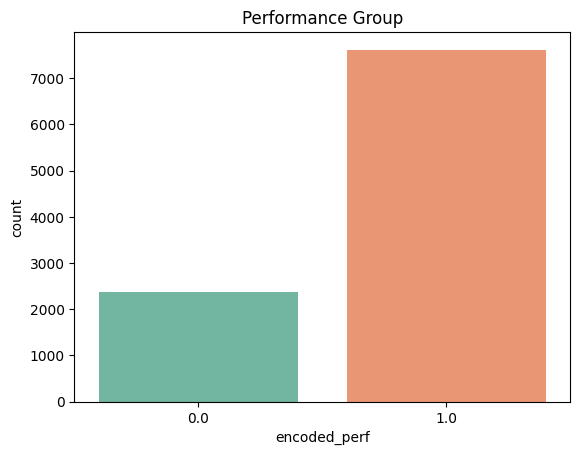

In [ ]:
sns.countplot(x='encoded_perf', data=student_df, palette="Set2")
plt.title("Performance Group")
#0 = fail, 1= pass- this took away the category perfomance index group to use the new category as the target variable.

In [ ]:
#CLASSIFICATION PASS/FAIL
#Using knn to predict if the student passed based on sleep, hours studied, and extra curricular activities


In [ ]:
student_df.columns.unique()

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Performance Index Group', 'encoded_perf'],
      dtype='object')

In [ ]:
# Splitting data into Indipendent and Dependent Variable
x = student_df.drop(["Performance Index",'Performance Index Group','encoded_perf','Previous Scores','Sample Question Papers Practiced' ], axis=1)
y = student_df['encoded_perf']

In [ ]:
#split the data into training and testing
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size= 0.2,
                                                  shuffle= True, #shuffle the data to avoid bias
                                                  random_state= 42)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [ ]:
# normalizing the feature values

scaler = Normalizer().fit(x_train) # scaler fitted to training set
normalized_x_train = scaler.transform(x_train) # applied to the training set
normalized_x_test = scaler.transform(x_test)  #  scaler applied to the test set

In [ ]:
#checking the normalization
print(x_train[:10])
print(normalized_x_train[:10])

[[5 0 7]
 [2 1 7]
 [2 0 7]
 [2 0 6]
 [8 0 9]
 [3 0 4]
 [3 1 4]
 [9 1 5]
 [4 1 6]
 [4 1 8]]
[[0.58123819 0.         0.81373347]
 [0.27216553 0.13608276 0.95257934]
 [0.27472113 0.         0.96152395]
 [0.31622777 0.         0.9486833 ]
 [0.66436384 0.         0.74740932]
 [0.6        0.         0.8       ]
 [0.58834841 0.19611614 0.78446454]
 [0.87006284 0.09667365 0.48336824]
 [0.54944226 0.13736056 0.82416338]
 [0.44444444 0.11111111 0.88888889]]


In [ ]:
# choosing a k value
k=10

#initializing
knn = KNeighborsClassifier(k)
knn.fit(normalized_x_train, y_train)
#the prediction
y_pred = knn.predict(normalized_x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.74

In [ ]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Y Prediction')

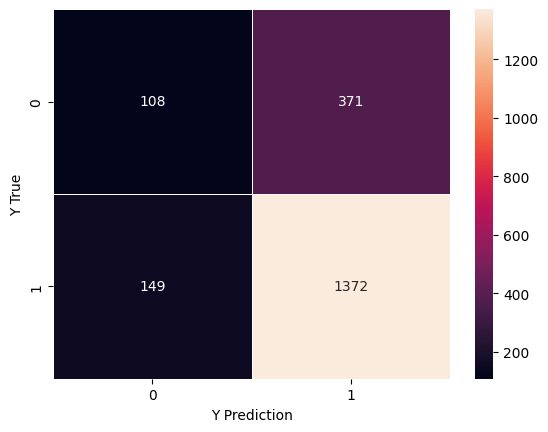

In [ ]:
sns.heatmap(cm,annot = True, linewidths= 0.5, fmt=".0f")
plt.ylabel("Y True")
plt.xlabel("Y Prediction")

#0 = fail, 1 = pass

In [ ]:
# cross vlaidation sklearn geeks for geeks
# k fold cross validation k is the tuning parameter (?)


In [ ]:
#kfold cross validation

from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(knn, x, y, cv = k_folds)
print(scores)


[0.7315 0.725  0.7245 0.706  0.7305]


In [ ]:
scores.mean()

0.7235

In [ ]:
student_df.columns.unique()

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Performance Index Group', 'encoded_perf'],
      dtype='object')

In [ ]:
# Decision Tree Classifier

feature_cols = ['Hours Studied','Extracarricular Activities','Sleep Hours','Sample Question Papers Practiced']
X = feature_cols
y = student_df['encoded_perf']

In [ ]:
#split the data into training and testing
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size= 0.3,
                                                  shuffle= True, #shuffle the data to avoid bias
                                                  random_state= 42)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [ ]:
clf = DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train,y_train)

In [ ]:
# predictions
y_pred = clf.predict(X_test)

In [ ]:
#to see how accurate your predictions were, use the true y's and the predicted y's
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9616666666666667


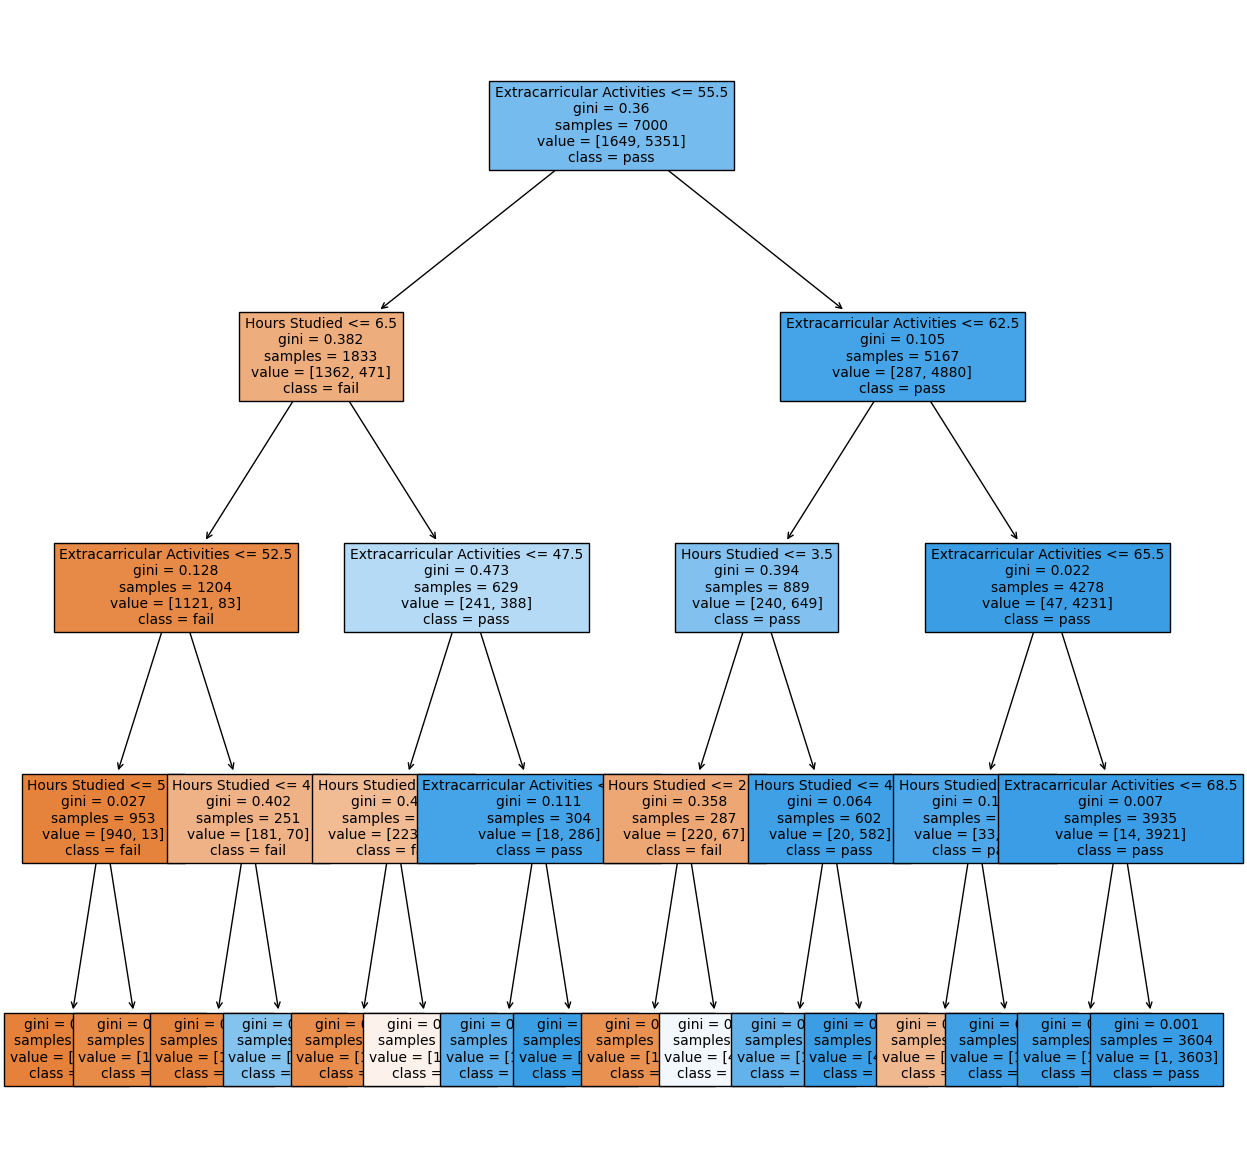

In [ ]:


import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(clf, feature_names=feature_cols, class_names=['fail','pass'], fontsize=10, filled=True)
plt.show()
